'data_housing.csv'contains data for 20,630 houses (it can be any accomodation e.g. appartments) in some city in Ukraine. Attributes:

    - rent: amount of montly payment in USD
    - dist: distance to center 
    - nrooms: number of rooms 
    - age: age of house 
    - size: are in sq.m
    - noccup: number of people registered in the house
    - price: price of the house
 

Task: 
   
    2) Try to fill the missed values of 'price'. Feel free to apply any approach e.g. statistical analysis or machine learning
    3) Provide csv file file with data keeping indexing as original dataset with filled all 'price' values you could predict as well as values of other columns you consider more accurate than in original dataset.
    4) Provide explanation of all your findings and achievements


 1) The data is not completely clean. Look for anomaly values (e.g. outliers, wrong format, missed values) and try to handle them. Please describe your discovceries and selected approach  

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# Load data

In [ ]:
df_housing = pd.read_csv('/content/drive/MyDrive/Father/camp2021/test_4/data_housing.csv',index_col='Unnamed: 0')

# train['rent']=pd.to_numeric(train["rent"])
df_housing


,rent,dist,nrooms,age,size,noccup,price
0,624,17.0,2.0,41,52,3,226300.0
1,622,17.0,2.0,21,43,3,NaN
2,544,17.0,2.0,52,57,3,176050.0
3,423,17.0,2.0,52,51,3,170650.0
4,288,17.0,2.0,52,44,3,171100.0
...,...,...,...,...,...,...,...
20625,117,20.0,2.0,25,52,3,39050.0
20626,191,20.0,2.0,18,63,3,38550.0
20627,127,20.0,2.0,17,47,3,46150.0
20628,140,20.0,2.0,18,43,3,42350.0


In [ ]:
# review types

df_housing.dtypes

rent       object
dist       object
nrooms    float64
age        object
size       object
noccup     object
price     float64
dtype: object

In [ ]:
#get statistic of missing values 
df_housing.isnull().sum()

rent       250
dist        50
nrooms      50
age         50
size        12
noccup      12
price     1264
dtype: int64

In [ ]:
col=list(df_housing)[0]
col

'rent'

In [ ]:
def convert_to_int(value):
  try:
    return float(value)
  except:
    print(value)

df_housing[col].apply(convert_to_int)

'274'
'204'
'192'
'114'
'231'
'870'
'230'
'307'
'288'
'265'
'233'
'392'
'506'
'182'
'192'
'289'
'889'
'442'
'190'
'283'
'357'
'180'
'511'
'286'
'186'
'321'
'445'
'158'
'429'
'253'
'226'
'130'
'229'
'190'
'140'
'225'
'174'
'168'
'244'
'423'
'308'
'400'
'237'
'432'
'333'
'377'
'740'
'219'
'850'
'311'
'395'
'441'
'392'
'272'
'298'
'139'
'124'
'246'
'204'
'193'
'93'
'300'
'148'
'140'
'357'
'274'
'166'
'256'
'153'
'181'
'173'
'265'
'283'
'112'
'186'
'176'
'213'
'145'
'88'
'169'
'300'
'122'
'281'
'279'
'201'
'220'
'374'
'179'
'150'
'301'
'311'
'196'
'131'
'164'
'349'
'237'
'397'
'419'
'817'
'451'
'301'
'279'
'419'
'277'
'226'
'285'
'157'
'169'
'274'
'254'
'189'
'377'
'264'
'313'
'308'
'450'
'411'
'631'
'503'
'318'
'202'
'189'
'210'
'191'
'113'
'638'
'222'
'353'
'198'
'150'
'146'
'125'
'145'
'80'
'89'
'91'
'138'
'352'
'176'
'161'
'164'
'108'
'135'
'137'
'111'
'152'
'84'
'150'
'269'
'810'
'164'
'277'
'242'
'290'
'331'
'313'
'198'
'399'
'220'
'157'
'221'
'497'
'520'
'197'
'152'
'320'
'216'
'309

0        624.0
1        622.0
2        544.0
3        423.0
4        288.0
         ...  
20625    117.0
20626    191.0
20627    127.0
20628    140.0
20629      NaN
Name: rent, Length: 20630, dtype: float64

In [ ]:
df_housing[col+ '_converted']=df_housing[col].apply(lambda x: str(x).replace("'",''))
df_housing

,rent,dist,nrooms,age,size,noccup,price,rent_converted
0,624,17.0,2.0,41,52,3,226300.0,624
1,622,17.0,2.0,21,43,3,NaN,622
2,544,17.0,2.0,52,57,3,176050.0,544
3,423,17.0,2.0,52,51,3,170650.0,423
4,288,17.0,2.0,52,44,3,171100.0,288
...,...,...,...,...,...,...,...,...
20625,117,20.0,2.0,25,52,3,39050.0,117
20626,191,20.0,2.0,18,63,3,38550.0,191
20627,127,20.0,2.0,17,47,3,46150.0,127
20628,140,20.0,2.0,18,43,3,42350.0,140


In [ ]:
df_housing[col+ '_converted']=df_housing[col+ '_converted'].apply(lambda x: convert_to_int(x))

In [ ]:
df_housing[col+ '_converted'].dtypes


dtype('float64')

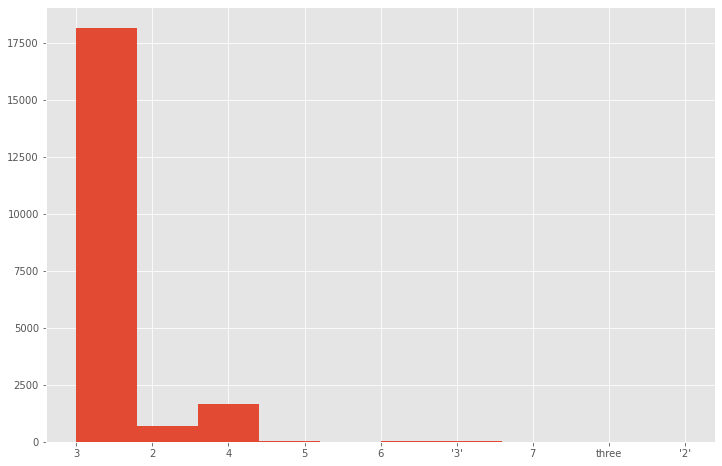

In [ ]:
df_housing['noccup'].hist()


In [ ]:
df_housing[df_housing[col+ '_converted']<0]

,rent,dist,nrooms,age,size,noccup,price,rent_converted
11,-245,17.0,2.0,52,41,3,120900.0,-245.0
43,-297,17.0,2.0,52,48,3,94400.0,-297.0
57,-61,17.0,2.0,52,60,3,42650.0,-61.0
161,-226,17.0,2.0,52,50,3,109200.0,-226.0
297,-163,16.0,2.0,47,51,3,53950.0,-163.0
...,...,...,...,...,...,...,...,...
19977,-166,3.0,2.0,25,70,3,32250.0,-166.0
20314,-267,7.0,2.0,31,171,5,97050.0,-267.0
20482,-374,8.0,2.0,10,57,3,102300.0,-374.0
20558,-361,18.0,2.0,18,60,3,69950.0,-361.0


In [ ]:
col_mid=df_housing[col+ '_converted'].median()
col_mid

263.0

In [ ]:
df_housing[col+ '_converted']=df_housing[col+ '_converted'].apply(lambda x: col_mid if x<0 else  x)

In [ ]:
df_housing[df_housing[col+ '_converted']<0]

,rent,dist,nrooms,age,size,noccup,price,rent_converted


In [ ]:
df_housing[col].isnull().sum()

250

In [ ]:
df_housing[col+ '_converted']=df_housing[col+ '_converted'].fillna(value=df_housing[col+ '_converted'].median())


In [ ]:
df_housing[col+ '_converted'].isnull().sum()

0

In [ ]:
df_housing['price'].hist()
df_housing[df_housing['price']>4*10**6]

NameError: ignored

In [ ]:
df_target=df_housing[df_housing['price'].isnull()]

In [ ]:

train.rent = train.rent .str.replace(r"[\"]", r" ")

train.iloc[6][0]

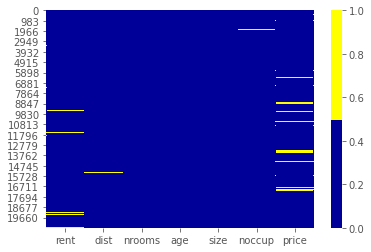

In [ ]:
cols = train.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(train[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
# replace missing values with the median.

train
train[['rent','dist','nrooms','age','size','noccup','price']] = train[['rent','dist','nrooms','age','size','noccup','price']].fillna(value=train[['rent','dist','nrooms','age','size','noccup','price']].median())
train['rent'] = train['rent'].fillna(100)

train.iloc[6][0]


'274'

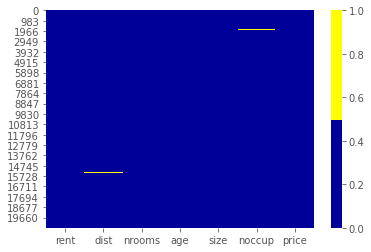

In [ ]:
cols = train.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(train[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
train.rent=train.rent.str.strip("'")
train

,rent,dist,nrooms,age,size,noccup,price
0,624,17.0,2.0,41,52,3,226300.0
1,622,17.0,2.0,21,43,3,90250.0
2,544,17.0,2.0,52,57,3,176050.0
3,423,17.0,2.0,52,51,3,170650.0
4,288,17.0,2.0,52,44,3,171100.0
...,...,...,...,...,...,...,...
20625,117,20.0,2.0,25,52,3,39050.0
20626,191,20.0,2.0,18,63,3,38550.0
20627,127,20.0,2.0,17,47,3,46150.0
20628,140,20.0,2.0,18,43,3,42350.0
